In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [12]:
results = h5py.File("glove-25-100k-100.hdf5", "r")
data = h5py.File("../../data/glove-25-angular.hdf5", "r")

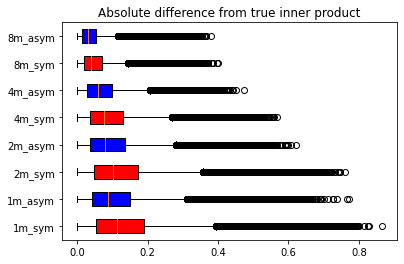

In [77]:
inner_prods = results["True_innner_product"][:]
inner_prods = inner_prods.reshape(inner_prods.shape[0] * inner_prods.shape[1])
all_diffs = []
labels = []
for m in [ 2**val for val in range(0,4)]:
    name = "%dm" % m
    symd    = results[name]["Symmetric_distance"][:]
    asymd   = results[name]["Asymmetric_distance"][:]
    symd = symd.reshape(symd.shape[0]*symd.shape[1])
    asymd = asymd.reshape(asymd.shape[0]*asymd.shape[1])
    symd_diff = np.abs(inner_prods - symd)
    asymd_diff = np.abs(inner_prods - asymd)
    all_diffs.append(symd_diff)
    labels.append(name + "_sym")
    all_diffs.append(asymd_diff)
    labels.append(name + "_asym")

bplot = plt.boxplot(all_diffs, vert=False, patch_artist=True, labels=labels)
for idx, patch in enumerate(bplot["boxes"]):
    patch.set_facecolor("red" if (idx%2==0) else "blue")

plt.title("Absolute difference from true inner product")
plt.show()



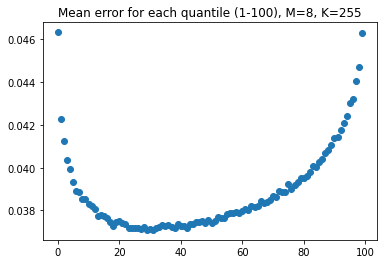

In [78]:
order = np.argsort(inner_prods)
m8_a = results["8m"]["Asymmetric_distance"][:]

m8_a = m8_a.reshape(m8_a.shape[0] * m8_a.shape[1])
m8_a_diffs = np.abs(inner_prods - m8_a)
m8_a_diffs = m8_a_diffs[order]
ordered_inner = inner_prods[order]

bins = 100
step = ordered_inner.shape[0]//bins

avgs = []
for i in range(bins):
    m8_a_sec = m8_a_diffs[i*step:(i+1)*step]
    avgs.append(np.mean(m8_a_sec))

scat = plt.scatter(range(bins),avgs)
plt.title("Mean error for each quantile (1-100), M=8, K=255")
plt.show()

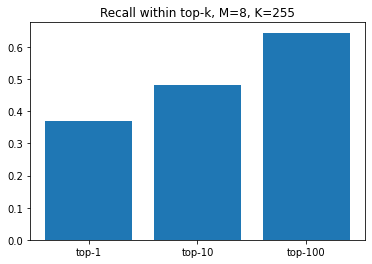

In [81]:

recalls = [0 for _ in range(3)]
for q, ans in zip(results["8m"]["Asymmetric_distance"], results["True_innner_product"]): 
    q_order = np.argsort(q)
    ans_order = np.argsort(ans)
    for i in range(3):
        top_k = 10**i
        intersection = np.intersect1d(q_order[:top_k], ans_order[:top_k])
        recalls[i]+= len(intersection)
for i in range(3):
    recalls[i] /= ((10**i)*results["True_innner_product"].shape[0])
plt.title("Recall within top-k, M=8, K=255")
plt.bar(["top-%d" % 10**i for i in range(3)], recalls)
plt.show()



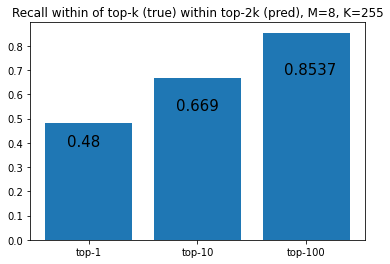

In [92]:
recalls = [0 for _ in range(3)]
for q, ans in zip(results["8m"]["Asymmetric_distance"], results["True_innner_product"]): 
    q_order = np.argsort(q)
    ans_order = np.argsort(ans)
    for i in range(3):
        top_k = 10**i
        intersection = np.intersect1d(q_order[:top_k*2], ans_order[:top_k])
        recalls[i]+= len(intersection)
for i in range(3):
    recalls[i] /= ((10**i)*results["True_innner_product"].shape[0])
plt.title("Recall within of top-k (true) within top-2k (pred), M=8, K=255")
plt.bar(["top-%d" % 10**i for i in range(3)], recalls)

for i in range(3):
    plt.text(x = i-0.2, y = recalls[i]-0.2*recalls[i], s = str(recalls[i]), size = 15)
plt.show()


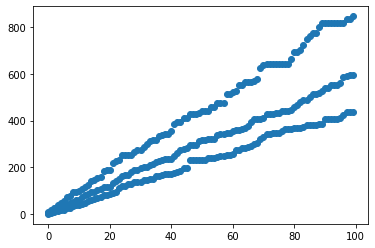

In [114]:
bins = 100

needed = [[] for _ in range(bins)]
for q, ans in zip(results["8m"]["Asymmetric_distance"], results["True_innner_product"]): 
    q_order = np.argsort(q)
    ans_order = np.argsort(ans)
    for i in range(bins):
        top_k = i+1
        set_ans_order = set(ans_order[:top_k])
        j = 0
        while len(set_ans_order) > 0:
            if q_order[j] in set_ans_order:
                set_ans_order.remove(q_order[j])
            j += 1
        needed[i].append(j)
y_dat = []
x_dat = []
for i in range(bins):
    y_dat.extend(list(np.quantile(needed[i],[0.25,0.5,0.75])))
    x_dat.extend([i]*3)
plt.scatter(x_dat, y_dat)
plt.show()


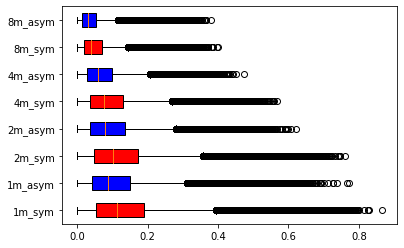

In [ ]:
inner_prods = results["True_innner_product"][:]
inner_prods = inner_prods.reshape(inner_prods.shape[0] * inner_prods.shape[1])
all_diffs = []
labels = []
for m in [ 2**val for val in range(0,4)]:
    name = "%dm" % m
    symd    = results[name]["Symmetric_distance"][:]
    asymd   = results[name]["Asymmetric_distance"][:]
    symd = symd.reshape(symd.shape[0]*symd.shape[1])
    asymd = asymd.reshape(asymd.shape[0]*asymd.shape[1])
    symd_diff = np.abs(inner_prods - symd)
    asymd_diff = np.abs(inner_prods - asymd)
    all_diffs.append(symd_diff)
    labels.append(name + "_sym")
    all_diffs.append(asymd_diff)
    labels.append(name + "_asym")

bplot = plt.boxplot(all_diffs, vert=False, patch_artist=True, labels=labels)
for idx, patch in enumerate(bplot["boxes"]):
    patch.set_facecolor("red" if (idx%2==0) else "blue")

plt.show()



In [25]:
inner_prods.shape

(100, 100000)

In [20]:
results.keys()

<KeysViewHDF5 ['1m', '2m', '4m', '8m', 'True_innner_product']>

In [10]:
res.keys()

<KeysViewHDF5 ['glove-25-1m', 'glove-25-2m', 'glove-25-3m', 'glove-25-4m', 'glove-25-5m', 'glove-25-6m', 'glove-25-7m', 'glove-25-8m']>

In [7]:
data

<HDF5 file "glove-25-100k-100.hdf5" (mode r)>

In [8]:
data["test"]

KeyError: "Unable to open object (object 'test' doesn't exist)"

In [ ]:
data.keys()

<KeysViewHDF5 ['neighbors', 'test', 'train']>

In [ ]:
hue = [(data["neighbors"][i], res["glove-25-1m"]["Asymmetric_distance"][i]) for i in range(1000)]

In [ ]:
#sorted(hue, key = lambda k: k[1], reverse = True)

In [ ]:
res["glove-25-1m"]["Asymmetric_distance"][:]

array([ 0.3486328 ,  0.25152588,  0.09381104,  0.85595703,  0.25109863,
       -0.01477051,  0.34490967,  0.1331482 ,  0.24298096,  0.4579773 ,
        0.3517151 , -0.22714233,  0.16720581,  0.24145508,  0.20126343,
       -0.02886963,  0.14144897,  0.54626465,  0.76000977,  0.11450195,
        0.23422241,  0.09915161, -0.15264893,  0.3517151 ,  0.40628052,
        0.23059082,  0.85595703,  0.14144897,  0.28805542,  0.38000488,
        0.34118652,  0.45755005,  0.2734375 ,  0.38693237,  0.4083557 ,
        0.35894775,  0.07498169,  0.4380188 ,  0.14144897,  0.36428833,
        0.5877991 ,  0.45440674,  0.11401367,  0.35406494,  0.19247437,
       -0.0519104 ,  0.24298096,  0.8630676 ,  0.77871704,  0.1716919 ,
       -0.00610352,  0.05947876,  0.44784546,  0.8630676 ,  0.19903564,
        0.07879639,  0.8630676 ,  0.39874268,  0.82788086,  0.24298096,
        0.07366943, -0.04595947,  0.5877991 ,  0.18359375, -0.05944824,
        0.42218018,  0.77871704,  0.02932739,  0.45983887,  0.25

In [ ]:
ansSym = []
ansAsym = []

for test in res.keys():
    asym = [(data["neighbors"][i], res[test]["Asymmetric_distance"][i]) for i in range(1000)]
    sym = [(data["neighbors"][i], res[test]["Symmetric_distance"][i]) for i in range(1000)]
    ansAsym.append(sorted(asym, key = lambda k: k[1], reverse = True))
    ansSym.append(sorted(sym, key = lambda k: k[1], reverse = True))
    

In [ ]:
ansSym[0][0:100]

[(array([28]), 0.8520813),
 (array([97]), 0.8520813),
 (array([65]), 0.8520813),
 (array([83]), 0.8520813),
 (array([40]), 0.8520813),
 (array([71]), 0.8520813),
 (array([29]), 0.8520813),
 (array([99]), 0.8520813),
 (array([73]), 0.8520813),
 (array([79]), 0.8520813),
 (array([59]), 0.8520813),
 (array([62]), 0.8520813),
 (array([93]), 0.8520813),
 (array([87]), 0.8520813),
 (array([24]), 0.8520813),
 (array([13]), 0.8520813),
 (array([0]), 0.8520813),
 (array([60]), 0.8520813),
 (array([69]), 0.8520813),
 (array([53]), 0.8520813),
 (array([46]), 0.8520813),
 (array([41]), 0.8520813),
 (array([86]), 0.833313),
 (array([10]), 0.833313),
 (array([30]), 0.833313),
 (array([94]), 0.833313),
 (array([19]), 0.833313),
 (array([43]), 0.833313),
 (array([17]), 0.833313),
 (array([35]), 0.833313),
 (array([6]), 0.833313),
 (array([68]), 0.833313),
 (array([67]), 0.833313),
 (array([25]), 0.833313),
 (array([72]), 0.833313),
 (array([34]), 0.833313),
 (array([31]), 0.833313),
 (array([64]), 0.8

Text(0.5, 1.0, 'Glove-25 ')

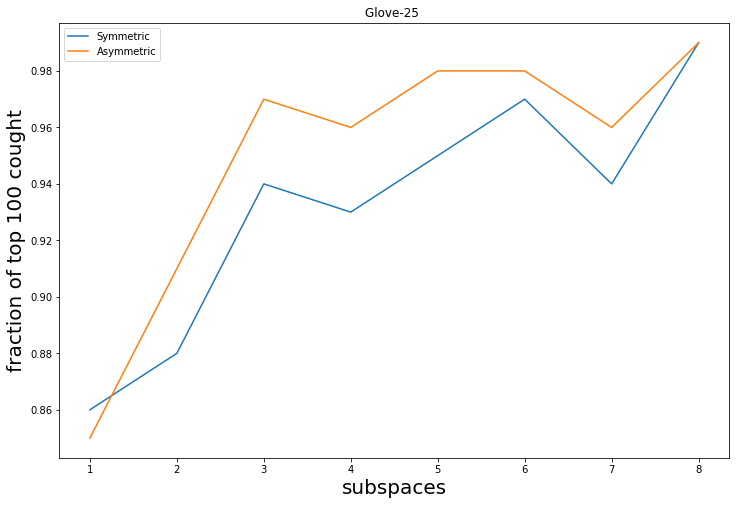

In [ ]:
ySym = []
yAsym = []
x = [i+1 for i in range(8)]

for m in ansSym:
    ySym.append(len(set([i for i in range(100)]).intersection(set([a[0] for a,b in m[:100]])))/100)

for m in ansAsym:
    yAsym.append(len(set([i for i in range(100)]).intersection(set([a[0] for a,b in m[:100]])))/100)
    
fig, ax1 = plt.subplots(1, 1)     

fig.set_figwidth(12)
fig.set_figheight(8)
ax1.plot(x,ySym)
ax1.plot(x,yAsym)
ax1.legend(["Symmetric", "Asymmetric"])
ax1.set_ylabel("fraction of top 100 cought", fontsize = 20)
ax1.set_xlabel("subspaces", fontsize = 20)
ax1.set_title("Glove-25 ")

In [ ]:
x = [25 - (25//(i+1) * (i+1)) for i in range(8)]

Text(0.5, 1.0, 'Glove-25 ')

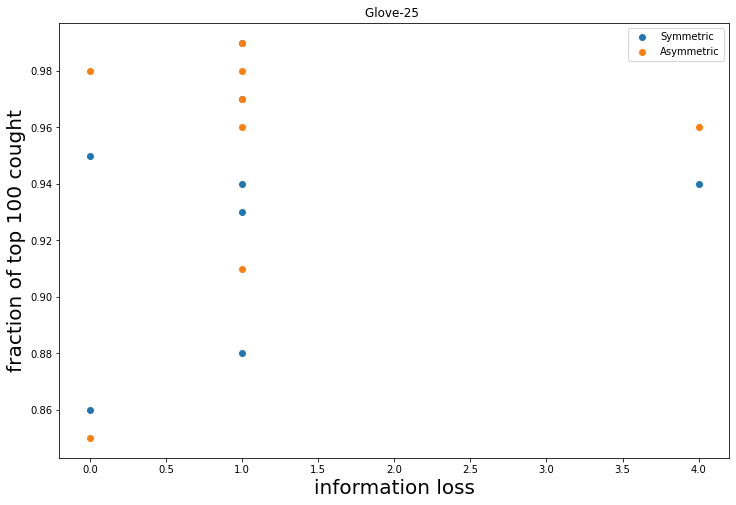

In [ ]:
fig, ax1 = plt.subplots(1, 1)     

fig.set_figwidth(12)
fig.set_figheight(8)
ax1.scatter(x,ySym)
ax1.scatter(x,yAsym)
ax1.legend(["Symmetric", "Asymmetric"])
ax1.set_ylabel("fraction of top 100 cought", fontsize = 20)
ax1.set_xlabel("information loss", fontsize = 20)
ax1.set_title("Glove-25 ")